In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
base_horas_estudos = pd.read_csv('horas_estudos.csv', sep=';', decimal = ',')

In [ ]:
base_horas_estudos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   horas_estudo    100 non-null    object
 1   nota_avaliacao  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


In [ ]:
base_horas_estudos.head()

,horas_estudo,nota_avaliacao
0,"16,07","40,05"
1,"20,41","66,49"
2,"34,29","91,5"
3,"34,1","87,09"
4,"32,34","69,3"


In [ ]:
base_horas_estudos['horas_estudo'].head

<bound method NDFrame.head of 0     16,07
1     20,41
2     34,29
3      34,1
4     32,34
      ...  
95     6,08
96     1,58
97     8,39
98    19,93
99     21,8
Name: horas_estudo, Length: 100, dtype: object>

In [1]:
base_horas_estudos ['horas_estudo'] = base_horas_estudos ['horas_estudo'].apply(lambda x: str(x).replace(",","."))


NameError: name 'base_horas_estudos' is not defined

In [ ]:
base_horas_estudos ['nota_avaliacao'] = base_horas_estudos ['nota_avaliacao'].apply(lambda x: str(x).replace(",","."))

In [ ]:
base_horas_estudos ['nota_avaliacao']=base_horas_estudos ['nota_avaliacao'].astype('float64')

In [ ]:
base_horas_estudos ['horas_estudo']=base_horas_estudos ['horas_estudo'].astype('float64')

In [ ]:
x_horas_estudo = base_horas_estudos.iloc[:,0].values
y_nota_avaliacao = base_horas_estudos.iloc[:,1].values

In [ ]:
np.corrcoef(x_horas_estudo,y_nota_avaliacao)

array([[1.        , 0.65975872],
       [0.65975872, 1.        ]])

In [ ]:
x_horas_estudo = x_horas_estudo.reshape(-1,1)

In [ ]:
previsao_nota = LinearRegression()
type(previsao_nota)

sklearn.linear_model._base.LinearRegression

In [ ]:
previsao_nota.fit(x_horas_estudo,y_nota_avaliacao)

LinearRegression()

In [ ]:
previsao_avaliacao=previsao_nota.predict(x_horas_estudo)
previsao_avaliacao

array([57.8709436 , 63.74108601, 82.51472121, 82.25773341, 79.87721483,
       46.0089277 , 40.6933379 , 60.12973112, 81.25683355, 60.18383381,
       57.49222473, 54.36779409, 71.00437283, 57.8168409 , 78.99804603,
       77.68605567, 54.93587239, 60.27851353, 83.71850618, 41.47782698,
       48.34886926, 66.82493963, 62.78076318, 60.56255268, 55.8556182 ,
       60.64370672, 54.50305083, 78.36233936, 65.72936006, 59.60222984,
       50.06662983, 86.35601256, 68.88084205, 51.7302877 , 50.51297706,
       49.32271777, 78.52464745, 36.64916144, 36.68973846, 60.90069452,
       88.99351895, 75.17028035, 57.76273821, 53.20458614, 43.26321592,
       75.42726815, 82.01427128, 57.16760856, 86.93761654, 44.54815493,
       53.32631721, 85.16575327, 43.69603748, 82.3659388 , 87.12697597,
       58.0738287 , 55.26048856, 72.68155638, 66.96019637, 76.31996262,
       73.72303326, 72.88444149, 52.20368628, 64.90429396, 69.48949737,
       62.41556998, 87.20813001, 88.16845285, 68.70500829, 72.07

In [ ]:
### resultado Pergunta 2 - utilizando o desvio padrão amostral

desvio_padrao_horas_estudo = x_horas_estudo.std(ddof=1)
desvio_padrao_horas_estudo

10.731427837633882

In [ ]:
### Resposta pergunta 5
grafico=px.scatter(x=x_horas_estudo.ravel(),y=y_nota_avaliacao)
grafico.add_scatter(x=x_horas_estudo.ravel(),y=previsao_avaliacao,name='Previsões')
grafico.show()

In [ ]:
### resultado Pergunta 6
media_notas = y_nota_avaliacao.mean()
media_notas

64.2226

In [ ]:
### Resultado pergunta 8

previsao_nota.intercept_

36.13518584017032

In [ ]:
### Resultado pergunta 9

previsao_nota.coef_

array([1.35256738])

In [ ]:
### Resultado pergunta 10
previsao_nota.predict([[25]])

array([69.94937028])

In [ ]:
### Resultado pergunta 11
prev_18=previsao_nota.predict([[18.06]])
hora_18=base_horas_estudos.loc[base_horas_estudos['horas_estudo']==18.06,'nota_avaliacao']
hora_18-prev_18

23    1.757447
Name: nota_avaliacao, dtype: float64

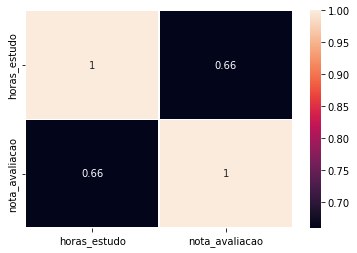

In [ ]:
### Resultado pergunta 12

correlation = base_horas_estudos.corr()
plot=sns.heatmap(correlation, annot=True, linewidths=.3)
plot

In [ ]:
### Resposta pergunta 13

previsao_nota.score(x_horas_estudo,y_nota_avaliacao)

0.43528156504806215

In [ ]:
#### Resposta pergunta 14
MAE1 =mean_absolute_error(y_nota_avaliacao,previsao_avaliacao)
MAE1

12.83868977098035

In [ ]:
#### Resposta pergunta 15
MSE1 = mean_squared_error(y_nota_avaliacao,previsao_avaliacao)
MSE1

270.601202088843